In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [65]:
data_1 = pd.read_csv("../DataSet/Screening/Autism Adolescent/new_csv_result-Autism-Adolescent-Data.csv")
data_2 = pd.read_csv("../DataSet/Screening/Autism adults/new_csv_result-Autism-Adult-Data.csv")
data_3 = pd.read_csv("../DataSet/Screening/Autism child/csv_result-Autism-Child-Data.csv")

In [66]:
frames = [data_1, data_2,data_3]
data = pd.concat(frames)

In [67]:
data.shape

(1100, 23)

In [68]:
data.to_csv('../DataSet/Screening/data.csv')

In [69]:
data['relation'].unique()

array(['Parent', 'Relative', 'Self', 'Health care professional', 'Others',
       '?', 'self'], dtype=object)

In [70]:
data['relation'].replace({'\'Health care professional\'':'Health care professional', 'self':'Self','Relative':'Others', 'Parent':'family member'}, inplace= True)

C:\Users\user\AppData\Local\Temp\ipykernel_6544\3162895458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['relation'].replace({'\'Health care professional\'':'Health care professional', 'self':'Self','Relative':'Others', 'Parent':'family member'}, inplace= True)


In [71]:
data['relation'].unique()

array(['family member', 'Others', 'Self', 'Health care professional', '?'],
      dtype=object)

In [72]:
data

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,id
0,0.0,0,0,0,1,1,1,1,1,1,...,Hispanic,1,1,Austria,0,6,12-16 years,family member,0,NaN
1,1.0,0,0,0,0,0,0,0,0,1,...,Black,0,0,Austria,0,2,12-16 years,Others,0,NaN
2,2.0,0,0,0,0,0,0,0,0,1,...,?,0,0,AmericanSamoa,0,2,12-16 years,Self,0,NaN
3,3.0,0,1,1,1,1,1,0,1,1,...,White-European,0,0,United Kingdom,0,7,12-16 years,Self,1,NaN
4,4.0,1,1,1,1,1,1,1,0,0,...,?,0,0,Albania,0,7,12-16 years,Self,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,NaN,1,1,1,1,1,1,1,1,1,...,White-European,yes,yes,United Kingdom,no,10,4-11 years,family member,YES,288.0
288,NaN,1,0,0,0,1,0,1,0,0,...,White-European,yes,yes,Australia,no,4,4-11 years,family member,NO,289.0
289,NaN,1,0,1,1,1,1,1,0,0,...,Latino,no,no,Brazil,no,7,4-11 years,family member,YES,290.0
290,NaN,1,1,1,0,1,1,1,1,1,...,South Asian,no,no,India,no,9,4-11 years,family member,YES,291.0


In [73]:
data.drop('Unnamed: 0', axis=1, inplace= True)
data.drop('id', axis=1, inplace= True )

In [74]:
data.drop('used_app_before', axis =1, inplace = True)

In [75]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result', 'age_desc',
       'relation', 'Class/ASD'],
      dtype='object')

In [76]:
col = data.pop('result')
data.insert(10,'result', col)


In [77]:
data.rename({'jundice':'jaundice'}, axis = 1, inplace= True)

In [78]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'result', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [79]:
col = data.pop('relation')
data.insert(15,'relation',col)

In [80]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,age,gender,ethnicity,jaundice,relation,austim,contry_of_res,age_desc,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,6,15,1,Hispanic,1,family member,1,Austria,12-16 years,0
1,0,0,0,0,0,0,0,0,1,1,2,15,1,Black,0,Others,0,Austria,12-16 years,0
2,0,0,0,0,0,0,0,0,1,1,2,12,0,?,0,Self,0,AmericanSamoa,12-16 years,0
3,0,1,1,1,1,1,0,1,1,0,7,14,0,White-European,0,Self,0,United Kingdom,12-16 years,1
4,1,1,1,1,1,1,1,0,0,0,7,16,0,?,0,Self,0,Albania,12-16 years,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,10,7,f,White-European,yes,family member,yes,United Kingdom,4-11 years,YES
288,1,0,0,0,1,0,1,0,0,1,4,7,f,White-European,yes,family member,yes,Australia,4-11 years,NO
289,1,0,1,1,1,1,1,0,0,1,7,4,m,Latino,no,family member,no,Brazil,4-11 years,YES
290,1,1,1,0,1,1,1,1,1,1,9,4,m,South Asian,no,family member,no,India,4-11 years,YES


In [81]:
data.drop('contry_of_res', axis = 1, inplace = True)

In [82]:
data.shape

(1100, 19)

In [83]:
data_4 = pd.read_csv("../DataSet/Screening/Autism toddler/new Toddler Autism dataset July 2018.csv")

In [84]:
frames = [data_4, data]
data = pd.concat(frames)

In [85]:
data.shape

(2154, 31)

In [86]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [87]:
data = pd.read_csv('../DataSet/Screening/data.csv')

In [88]:
data['austim'].replace(['yes','no','1','0'],[1,0,1,0], inplace = True)
data['austim'] = data['austim'].fillna(data['austim'].mean())
data['age'] = data['age'].apply(lambda x: int(x) if str(x).isdigit() else None)
data['age'].fillna(data['age'].mean(), inplace= True)
data['gender'].replace(['m','f'],[1,0], inplace= True)
data['ethnicity'].replace(['middle eastern','black','White-European','asian','south asian','others','Pasifika','Middle Eastern ','mixed'],['Middle Eastern','Black','White European','Asian','South Asian','Others','Pacifica','Middle Eastern','Mixed'], inplace = True)
data['ethnicity'].replace('?','White European', inplace= True)
data['relation'].replace('?','family member',inplace= True)
data['jundice'].replace(['yes','no','1','0'],[1,0,1,0], inplace = True)
data['Class/ASD'].replace(['YES','NO','1','0'],[1,0,1,0], inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_6544\4132669578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['austim'].replace(['yes','no','1','0'],[1,0,1,0], inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_6544\4132669578.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['a

In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [90]:
data['ethnicity'] = label_encoder.fit_transform(data['ethnicity'])
data['relation'] = label_encoder.fit_transform(data['relation'])
data['age_desc'] = label_encoder.fit_transform(data['age_desc'])

In [91]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [92]:
data.to_csv('../DataSet/Screening/data.csv')

In [93]:
# Select only numeric columns before computing correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_data.corr()


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

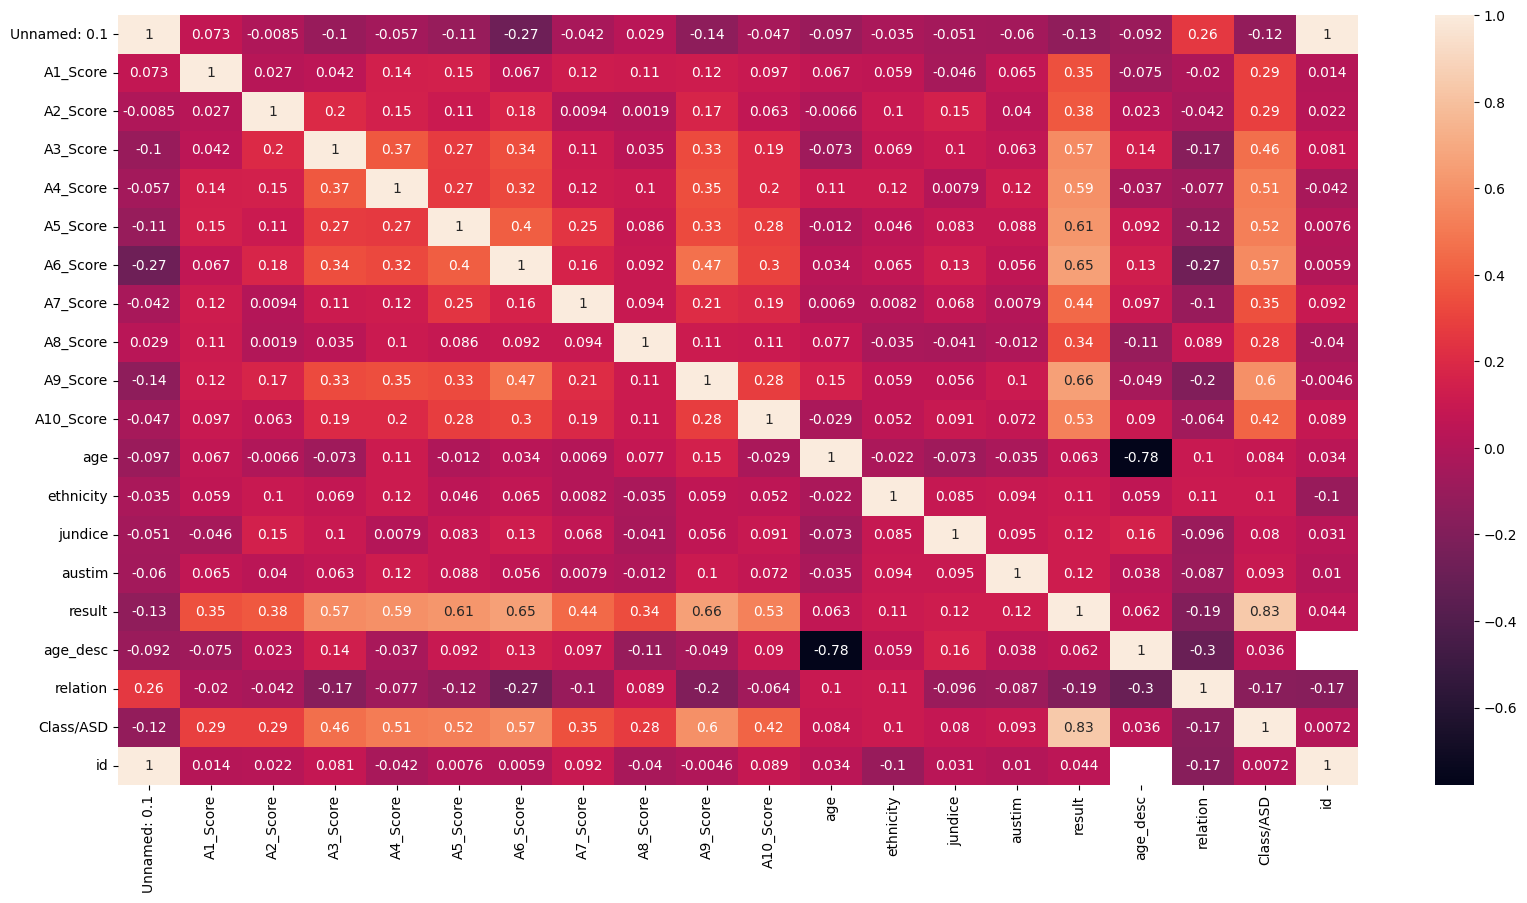

In [95]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)